<h1> Modeling Naive Bayes </h1>

<img src="https://ih1.redbubble.net/image.1450572675.6311/st,small,507x507-pad,600x600,f8f8f8.jpg" width="200" />

In [1]:
# from ipynb.fs.full.functions import *
from ipynb.fs.full.functions_stream_env import *
import spacy

In [2]:
# Data to create our model
dfa = pd.read_csv('../data/ama_comments.csv')
dfb = pd.read_csv('../data/ar_comments.csv')
df = pd.concat([dfa, dfb], axis=0)
df = CleanUp(df).df.copy()

In [3]:
# Model X, and y
df = df.sample(n=df.shape[0], random_state=3)

X_other = df.drop(columns=['subreddit_binary', 'body'])
# X = df[['body', 'all_awardings']]
X = df['body']
y = df['subreddit_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=3)

In [4]:
X_other_train, X_other_test, y_other_train, y_other_test = train_test_split(X_other, 
    y, stratify=y, random_state=3)


In [5]:
# TEST data (not part of train/test/split)
df1 = pd.read_csv('../data/2021-04-27_1812_AMA_comments.csv')
df2 = pd.read_csv('../data/2021-04-27_1812_AskReddit_comments.csv')
df_test_pred = pd.concat([df1, df2], axis=0)
df_test_pred = CleanUp(df_test_pred).df.copy()

In [6]:
df_test_pred = df_test_pred.sample(n=df_test_pred.shape[0], random_state=3)

X_other_new = df_test_pred.drop(columns=['subreddit_binary', 'body'])
X_new = df_test_pred['body']
y_new = df_test_pred['subreddit_binary'] 

In [7]:
X_other_new.columns

Index(['author_premium', 'is_submitter', 'no_follow', 'score', 'send_replies',
       'total_awards_received', 'post_length'],
      dtype='object')

In [8]:
### Did this Run???

<h2 style="color:red;"> (gridsearch) TfidfVectorizer(), LogisticRegression() </h2>
<h2 style="color:red;"> BEST! test score: 72.17% </h2>

#### BEST Params:
 - max_features: 5000
 - ngram_range: (1,2)
 - stop_words: None

In [9]:
# ### Best Train ###

gs_tv_lgr = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    LogisticRegression()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf LogReg')


In [10]:
## FIT BEST onto X, and try on fresh data!!

X_gs_tv_lgr = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    LogisticRegression()), 
    X_train=X, X_test=X_new, y_train=y, y_test=y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf LogReg')


## Bayes Models

### First, our previous Bayesian models, without lemma-tization

<h2> (gridsearch) CountVectorizer(), MultinomialNB() </h2>


In [11]:
gs_cv_nb = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    MultinomialNB()), 
    X_train, X_test, y_train, y_test,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test cVect nBayes')



In [12]:
X_gs_cv_nb = ClassificationModel(make_pipeline(
    CountVectorizer(), 
    MultinomialNB()), 
    X, X_new, y, y_new,
    params={
        'countvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'countvectorizer__stop_words': [ 'english', None ],
        'countvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new cVect nBayes')



<h2> (gridsearch) TfidfVectorizer(), MultinomialNB() </h2>


In [13]:
gs_tv_nb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()), 
    X_train, X_test, y_train, y_test,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Train/Test Tfidf nBayes')



In [14]:
X_gs_tv_nb = ClassificationModel(make_pipeline(
    TfidfVectorizer(), 
    MultinomialNB()), 
    X, X_new, y, y_new,
    params={
        'tfidfvectorizer__ngram_range': [ (1, 1), (1, 2), (2, 2), (1, 3), (2, 3), (3, 3) ],
        'tfidfvectorizer__stop_words': [ 'english', None ],
        'tfidfvectorizer__max_features': [ 500, 1000, 2000, 5000 ]
}, verbose=3, mod_name='Xy/new Tfidf nBayes')

compare_nb = pd.concat([gs_cv_nb.df, X_gs_cv_nb.df, gs_tv_nb.df, X_gs_tv_nb.df], axis=1)
compare_nb

,Train/Test cVect nBayes,Xy/new cVect nBayes,Train/Test Tfidf nBayes,Xy/new Tfidf nBayes
F1 Score,0.694783,0.607512,0.706342,0.617551
Recall Score,0.649593,0.571721,0.660976,0.584016
Accuracy,0.714286,0.632518,0.724868,0.640163
Balanced Accuracy,0.714365,0.632210,0.724946,0.639878
Precision Score,0.746729,0.648084,0.758396,0.655172
Average Precision Score,0.783224,0.660172,0.805360,0.664641
ROC AUC Score,0.787958,0.668874,0.801734,0.693314
True Positive,956.000000,683.000000,968.000000,686.000000
False Negative,271.000000,303.000000,259.000000,300.000000
False Positive,431.000000,418.000000,417.000000,406.000000


<h3> STOP </h3>
<h2> LEMMA-TIME! </h2>
<img src="https://i.imgflip.com/xv6aq.jpg" />
<strong><em> (Just a reminder that if I want to use Spacy, I need to change my conda env) </em></strong>

<h2> (gridsearch) CountVectorizer(<em>tokenizer=lemmatized</em>), MultinomialNB() </h2>

#### BEST Params:
 - max_features: 5000
 - ngram_range: (1,1)
 - stop_words: None

In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
def lemmatized(sentence):
    doc = nlp(sentence)
    return [token.lemma_ for token in doc]

In [17]:

cvect = CountVectorizer(tokenizer=lemmatized)
X_train_cv_lemma = cvect.fit_transform(X_train)
X_test_cv_lemma = cvect.transform(X_test)

X_cv_lemma = cvect.fit_transform(X)
X_new_cv_lemma = cvect.transform(X_new)


In [18]:

tvect = TfidfVectorizer(tokenizer=lemmatized)
X_train_tv_lemma = tvect.fit_transform(X_train)
X_test_tv_lemma = tvect.transform(X_test)

X_tv_lemma = tvect.fit_transform(X)
X_new_tv_lemma = tvect.transform(X_new)


In [19]:
gs_cv_nb = GridSearchCV(make_pipeline(CountVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
gs_cv_nb.fit(X_train, y_train)
y_gs_cv_nb = gs_cv_nb.predict(X_test)
print_classification_stats(y_test, y_gs_cv_nb)

{'F1 Score': 0.6928635953026198,
 'Recall Score': 0.6235772357723577,
 'Accuracy Score': 0.7232397232397232,
 'Balanced Accuracy': 0.7233615600214682,
 'Precision Score': 0.7794715447154471,
 'True Positive': 767,
 'False Negative': 463,
 'False Positive': 217,
 'True Negative': 1010,
 'Calculated Accuracy': 0.7232397232397232,
 'Calculated Precision': 0.7794715447154471,
 'Calculated Sensitivity': 0.6235772357723577,
 'Calculated Specificity': 0.8231458842705787}

In [20]:
X_gs_cv_nb = GridSearchCV(make_pipeline(CountVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
X_gs_cv_nb.fit(X, y)
y_X_gs_cv_nb = X_gs_cv_nb.predict(X_new)
print_classification_stats(y_new, y_X_gs_cv_nb)


{'F1 Score': 0.6083001705514497,
 'Recall Score': 0.548155737704918,
 'Accuracy Score': 0.6488277268093782,
 'Balanced Accuracy': 0.6483172197652378,
 'Precision Score': 0.6832694763729247,
 'True Positive': 535,
 'False Negative': 441,
 'False Positive': 248,
 'True Negative': 738,
 'Calculated Accuracy': 0.6488277268093782,
 'Calculated Precision': 0.6832694763729247,
 'Calculated Sensitivity': 0.548155737704918,
 'Calculated Specificity': 0.7484787018255578}

#### Try it without Gridsearch
...and it is the same - which is good! But the values are not better than Logistic Regression.

In [21]:
bayes_cv_lemma = MultinomialNB()
bayes_cv_lemma.fit(X_train_cv_lemma, y_train)

bayes_cv_lemma.predict(X_test_cv_lemma)
# (X_test_cv_lemma.shape, y_test.shape)

bayes_cv_lemma_dict = print_classification_stats(y_test, bayes_cv_lemma.predict(X_test_cv_lemma))
bayes_cv_lemma_dict

{'F1 Score': 0.6928635953026198,
 'Recall Score': 0.6235772357723577,
 'Accuracy Score': 0.7232397232397232,
 'Balanced Accuracy': 0.7233615600214682,
 'Precision Score': 0.7794715447154471,
 'True Positive': 767,
 'False Negative': 463,
 'False Positive': 217,
 'True Negative': 1010,
 'Calculated Accuracy': 0.7232397232397232,
 'Calculated Precision': 0.7794715447154471,
 'Calculated Sensitivity': 0.6235772357723577,
 'Calculated Specificity': 0.8231458842705787}

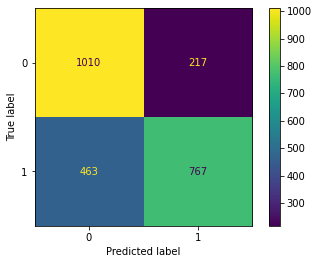

In [36]:
plot_confusion_matrix(bayes_cv_lemma, X_test_cv_lemma, y_test)
plt.savefig('../../images/bayes_test_cv_lemma_CM.png', bbox_in='tight')

In [22]:
bayes_cv_lemma_df = pd.DataFrame([bayes_cv_lemma_dict]).T.rename(columns={0: 'Train/Test cVect nBayes no GS'}, errors="raise")
bayes_cv_lemma_df

,Train/Test cVect nBayes no GS
F1 Score,0.692864
Recall Score,0.623577
Accuracy Score,0.723240
Balanced Accuracy,0.723362
Precision Score,0.779472
True Positive,767.000000
False Negative,463.000000
False Positive,217.000000
True Negative,1010.000000
Calculated Accuracy,0.723240


In [23]:
X_bayes_cv_lemma = MultinomialNB()
X_bayes_cv_lemma.fit(X_cv_lemma, y)
X_bayes_cv_lemma.predict(X_new_cv_lemma)

X_bayes_cv_lemma_dict = print_classification_stats(y_new, X_bayes_cv_lemma.predict(X_new_cv_lemma))
X_bayes_cv_lemma_dict

{'F1 Score': 0.6083001705514497,
 'Recall Score': 0.548155737704918,
 'Accuracy Score': 0.6488277268093782,
 'Balanced Accuracy': 0.6483172197652378,
 'Precision Score': 0.6832694763729247,
 'True Positive': 535,
 'False Negative': 441,
 'False Positive': 248,
 'True Negative': 738,
 'Calculated Accuracy': 0.6488277268093782,
 'Calculated Precision': 0.6832694763729247,
 'Calculated Sensitivity': 0.548155737704918,
 'Calculated Specificity': 0.7484787018255578}

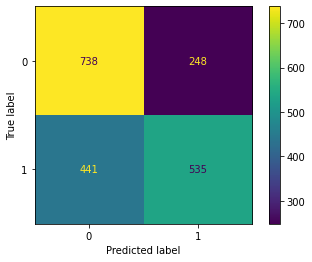

In [41]:
plot_confusion_matrix(X_bayes_cv_lemma, X_new_cv_lemma, y_new)
plt.savefig('../../images/X_bayes_test_cv_lemma_CM.png', bbox_in='tight')

In [24]:
y_new_bayes_cv_lemma_df = pd.DataFrame([X_bayes_cv_lemma_dict]).T.rename(columns={0: 'Xy/new cVect nBayes no GS'}, errors="raise")
y_new_bayes_cv_lemma_df

,Xy/new cVect nBayes no GS
F1 Score,0.608300
Recall Score,0.548156
Accuracy Score,0.648828
Balanced Accuracy,0.648317
Precision Score,0.683269
True Positive,535.000000
False Negative,441.000000
False Positive,248.000000
True Negative,738.000000
Calculated Accuracy,0.648828


<h2> (gridsearch) TfidfVectorizer(<em>tokenizer=lemmatized</em>), MultinomialNB() </h2>

#### BEST Params:
 - max_features: 5000
 - ngram_range: (1,1)
 - stop_words: None

In [25]:
gs_tv_nb = GridSearchCV(make_pipeline(TfidfVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
gs_tv_nb.fit(X_train, y_train)
y_gs_tv_nb = gs_tv_nb.predict(X_test)
print_classification_stats(y_test, y_gs_tv_nb)


{'F1 Score': 0.6679227508243053,
 'Recall Score': 0.5764227642276423,
 'Accuracy Score': 0.7130647130647131,
 'Balanced Accuracy': 0.7132317570119466,
 'Precision Score': 0.793952967525196,
 'True Positive': 709,
 'False Negative': 521,
 'False Positive': 184,
 'True Negative': 1043,
 'Calculated Accuracy': 0.7130647130647131,
 'Calculated Precision': 0.793952967525196,
 'Calculated Sensitivity': 0.5764227642276423,
 'Calculated Specificity': 0.850040749796251}

In [26]:
X_gs_tv_nb = GridSearchCV(make_pipeline(TfidfVectorizer(tokenizer=lemmatized), MultinomialNB()), {})
X_gs_tv_nb.fit(X, y)
y_X_gs_tv_nb = X_gs_tv_nb.predict(X_new)
print_classification_stats(y_new, y_X_gs_tv_nb)


{'F1 Score': 0.5861062463514303,
 'Recall Score': 0.514344262295082,
 'Accuracy Score': 0.6386340468909276,
 'Balanced Accuracy': 0.6380037741495694,
 'Precision Score': 0.6811397557666214,
 'True Positive': 502,
 'False Negative': 474,
 'False Positive': 235,
 'True Negative': 751,
 'Calculated Accuracy': 0.6386340468909276,
 'Calculated Precision': 0.6811397557666214,
 'Calculated Sensitivity': 0.514344262295082,
 'Calculated Specificity': 0.7616632860040567}

#### Try it without Gridsearch
...and it is the same - which is good! But the values are not better than Logistic Regression.

In [27]:
bayes_tv_lemma = MultinomialNB()
bayes_tv_lemma.fit(X_train_tv_lemma, y_train)

bayes_tv_lemma.predict(X_test_tv_lemma)
# (X_test_cv_lemma.shape, y_test.shape)

bayes_tv_lemma_dict = print_classification_stats(y_test, bayes_tv_lemma.predict(X_test_tv_lemma))
bayes_tv_lemma_dict

{'F1 Score': 0.6679227508243053,
 'Recall Score': 0.5764227642276423,
 'Accuracy Score': 0.7130647130647131,
 'Balanced Accuracy': 0.7132317570119466,
 'Precision Score': 0.793952967525196,
 'True Positive': 709,
 'False Negative': 521,
 'False Positive': 184,
 'True Negative': 1043,
 'Calculated Accuracy': 0.7130647130647131,
 'Calculated Precision': 0.793952967525196,
 'Calculated Sensitivity': 0.5764227642276423,
 'Calculated Specificity': 0.850040749796251}

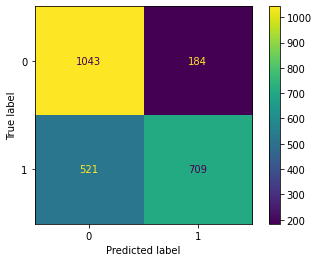

In [35]:
plot_confusion_matrix(bayes_tv_lemma, X_test_tv_lemma, y_test)
plt.savefig('../../images/bayes_test_tv_lemma_CM.png', bbox_in='tight')

In [28]:
bayes_tv_lemma_df = pd.DataFrame([bayes_tv_lemma_dict]).T.rename(columns={0: 'Train/Test tVect nBayes no GS'}, errors="raise")
bayes_tv_lemma_df

,Train/Test tVect nBayes no GS
F1 Score,0.667923
Recall Score,0.576423
Accuracy Score,0.713065
Balanced Accuracy,0.713232
Precision Score,0.793953
True Positive,709.000000
False Negative,521.000000
False Positive,184.000000
True Negative,1043.000000
Calculated Accuracy,0.713065


In [29]:
X_bayes_tv_lemma = MultinomialNB()
X_bayes_tv_lemma.fit(X_tv_lemma, y)
X_bayes_tv_lemma.predict(X_new_tv_lemma)

X_bayes_tv_lemma_dict = print_classification_stats(y_new, X_bayes_tv_lemma.predict(X_new_tv_lemma))
X_bayes_tv_lemma_dict

{'F1 Score': 0.5861062463514303,
 'Recall Score': 0.514344262295082,
 'Accuracy Score': 0.6386340468909276,
 'Balanced Accuracy': 0.6380037741495694,
 'Precision Score': 0.6811397557666214,
 'True Positive': 502,
 'False Negative': 474,
 'False Positive': 235,
 'True Negative': 751,
 'Calculated Accuracy': 0.6386340468909276,
 'Calculated Precision': 0.6811397557666214,
 'Calculated Sensitivity': 0.514344262295082,
 'Calculated Specificity': 0.7616632860040567}

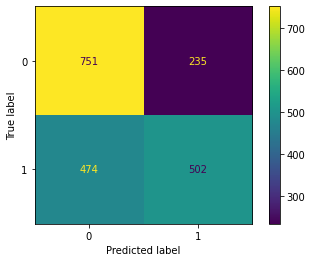

In [42]:
plot_confusion_matrix(X_bayes_tv_lemma, X_new_tv_lemma, y_new)
plt.savefig('../../images/X_bayes_test_tv_lemma_CM.png', bbox_in='tight')

In [30]:
y_new_bayes_tv_lemma_df = pd.DataFrame([X_bayes_tv_lemma_dict]).T.rename(columns={0: 'Xy/new cVect nBayes no GS'}, errors="raise")
y_new_bayes_tv_lemma_df

,Xy/new cVect nBayes no GS
F1 Score,0.586106
Recall Score,0.514344
Accuracy Score,0.638634
Balanced Accuracy,0.638004
Precision Score,0.681140
True Positive,502.000000
False Negative,474.000000
False Positive,235.000000
True Negative,751.000000
Calculated Accuracy,0.638634


# COMPARE

In [31]:
compare_nb = pd.concat([compare_nb, bayes_cv_lemma_df, y_new_bayes_cv_lemma_df, bayes_tv_lemma_df, y_new_bayes_tv_lemma_df], axis=1)
compare_nb

,Train/Test cVect nBayes,Xy/new cVect nBayes,Train/Test Tfidf nBayes,Xy/new Tfidf nBayes,Train/Test cVect nBayes no GS,Xy/new cVect nBayes no GS,Train/Test tVect nBayes no GS,Xy/new cVect nBayes no GS
F1 Score,0.694783,0.607512,0.706342,0.617551,0.692864,0.608300,0.667923,0.586106
Recall Score,0.649593,0.571721,0.660976,0.584016,0.623577,0.548156,0.576423,0.514344
Accuracy,0.714286,0.632518,0.724868,0.640163,NaN,NaN,NaN,NaN
Balanced Accuracy,0.714365,0.632210,0.724946,0.639878,0.723362,0.648317,0.713232,0.638004
Precision Score,0.746729,0.648084,0.758396,0.655172,0.779472,0.683269,0.793953,0.681140
Average Precision Score,0.783224,0.660172,0.805360,0.664641,NaN,NaN,NaN,NaN
ROC AUC Score,0.787958,0.668874,0.801734,0.693314,NaN,NaN,NaN,NaN
True Positive,956.000000,683.000000,968.000000,686.000000,767.000000,535.000000,709.000000,502.000000
False Negative,271.000000,303.000000,259.000000,300.000000,463.000000,441.000000,521.000000,474.000000
False Positive,431.000000,418.000000,417.000000,406.000000,217.000000,248.000000,184.000000,235.000000


#### The Gridsearch with Tfidf Vectorization and without Lemma-tization yeilded better results.

In [32]:
from IPython.lib.display import Audio

print(datetime.datetime.now().strftime('\nFINISH: %Y-%m-%d, %H:%M:%S'))

framerate = 4410
play_time_seconds = 3
t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(2*np.pi*239*t) + np.sin(2*np.pi*440*t) + np.sin(4*np.pi*440*t) + np.sin(4*np.pi*239*t)
Audio(audio_data, rate=framerate, autoplay=True)


FINISH: 2021-05-04, 01:22:15


In [33]:
### Has this Run???